In [617]:
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
import csv
import json
import lxml.html as lh
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import sqlite3
import urllib.request #importing packages

In [33]:
def flatten(list_of_lists):
    if len(list_of_lists) == 0:
        return list_of_lists
    if isinstance(list_of_lists[0], list):
        return flatten(list_of_lists[0]) + flatten(list_of_lists[1:])
    return list_of_lists[:1] + flatten(list_of_lists[1:])
#There are a lot of nested lists. This will flatten all lists into one.
#Replace Headers
with urllib.request.urlopen('https://api.fda.gov/drug/label.json?search=adverse_reactions:"aspirin"&limit=5') as url:
    #This brings in the info from the API.
    api = json.loads(url.read().decode()) #This decodes the info coming in.
    api['about'] = api['meta'] #Changing the dictionary key.
    del api['meta'] #Deleting the old key.
#-Find duplicates

apidup = api['results'][0]['adverse_reactions'][0] #pulls the adverse reactions and looks into the list. 
apidup = apidup.split(' ') #Creates a new list, separated by a space.
apidup

apiduplist = [] #The new list.

for x in apidup:
    if x not in apiduplist:
        apiduplist.append(x) #This removes all duplicates if it's not already in there.    

In [34]:
fenurl = 'https://api.fda.gov/drug/label.json?search=adverse_reactions:"fentanyl"&limit=5'
search = r'search=(.*)&limit' #This is a regular expression, which searches within the field.

with urllib.request.urlopen('https://api.fda.gov/drug/label.json?search=adverse_reactions:"fentanyl"&limit=5') as url:
        fen = json.loads(url.read().decode())

In [37]:
#Format data into a more readable format
fenresults = fen['results'][0]['adverse_reactions'][0]
fenresults = fenresults.upper() #Fix casing or inconsistent values/capitalizing everything.
fenresults = fenresults.split('.') #splits based on commas. 
fenresults = fenresults[17][140:] #Slicing through the data to find 
fenresults = fenresults.split(', ')
fenresults[9] = fenresults[9].split('AND ') #isolating the 'and' to remove. 
fenresults[9] = 'ANOREXIA' #renaming an index for clarity.

In [38]:
fenOD = fen['results'][0]['overdosage'][0] #Filters to find the list.
oldfenODlist = [] #The old list, which all the items go into it.
fenODlist = [] #The new list, which everything will end up going into.

oldfenODlist.append(fenOD[92:276].split(', '))
oldfenODlist[0][5] = "bradycardia" 
oldfenODlist[0][6] = 'hypotension'
oldfenODlist.append('death')

fenODlist = flatten(oldfenODlist) #Flattens the old list and transfers it into the new one.

In [39]:
hydrocurl = 'https://api.fda.gov/drug/label.json?search=adverse_reactions:"hydrocodone"&limit=5'
search = r'search=(.*)&limit'

with urllib.request.urlopen('https://api.fda.gov/drug/label.json?search=adverse_reactions:"hydrocodone"&limit=5') as url:
    if fuzz.WRatio(search, hydrocurl) >= 80: #Conduct Fuzzy Matchinga
        hydroc = json.loads(url.read().decode())

In [40]:
#Format data into a more readable format
hydrocresults = hydroc['results'][0]['adverse_reactions'][0]
hydrocresults = hydrocresults.upper() #Fix casing or inconsistent values
hydrocresults = hydrocresults[69:126]
hydrocresults = hydrocresults.split(',')
hydrocresults[3] = hydrocresults[3].split('AND')
hydrocresults[3] = 'NAUSEA'
hydrocresults.append('VOMITING')

In [419]:
#Format data into a more readable format
oldhydrocODlist = []
hydrocODlist = []
hydrocOD = hydroc['results'][0]['overdosage'][0]
oldhydrocODlist.append(hydrocOD[184:296])
oldhydrocODlist.append(hydrocOD[298:439].split(", "))
oldhydrocODlist.append(hydrocOD[463:516].split(", "))
oldhydrocODlist[2] = oldhydrocODlist[2][2].split(' and ')
oldhydrocODlist[0] = oldhydrocODlist[0].split(" (a decrease in respiratory rate and/or tidal volume, Cheyne-Stokes respiration, cyanosis)")
oldhydrocODlist[0].remove("")

hydrocODlist = flatten(oldhydrocODlist)

hydrocODlist[4] = "bradycardia"
hydrocODlist.insert(5,'hypotension')

In [42]:
hydromurl = 'https://api.fda.gov/drug/label.json?search=adverse_reactions:"hydromorphone"&limit=5'

with urllib.request.urlopen('https://api.fda.gov/drug/label.json?search=adverse_reactions:"hydromorphone"&limit=5') as url:
    if fuzz.WRatio(search, hydromurl) >= 80: #Conduct Fuzzy Matchinga
        hydrom = json.loads(url.read().decode())

In [43]:
#Format data into a more readable format
hydromresults = hydrom['results'][0]['adverse_reactions'][0]
hydromresults = hydromresults.upper() #Fix casing or inconsistent values
hydromresults = hydromresults[792:912]
hydromresults = hydromresults.split(', ')
hydromresults[10] = hydromresults[10].split('AND ')
hydromresults[10] = 'PRURITUS'

In [312]:
hydromOD = hydrom['results'][0]['overdosage'][0]
oldhydromODlist = []
hydromODlist = []

oldhydromODlist.append(hydromOD[158:424].split(", "))
hydromODlist = flatten(oldhydromODlist)

del hydromODlist[5]
del hydromODlist[5]
hydromODlist[10] = 'death'

['respiratory depression',
 'somnolence progressing to stupor or coma',
 'skeletal muscle flaccidity',
 'cold and clammy skin',
 'constricted pupils',
 'pulmonary edema',
 'bradycardia',
 'hypotension',
 'partial or complete airway obstruction',
 'atypical snoring',
 'death']

In [45]:
codurl = 'https://api.fda.gov/drug/label.json?search=adverse_reactions:"codeine"&limit=5'

with urllib.request.urlopen('https://api.fda.gov/drug/label.json?search=adverse_reactions:"codeine"&limit=5') as url:
    if fuzz.WRatio(search, codurl) >= 80: #Conduct Fuzzy Matchinga
        cod = json.loads(url.read().decode())

In [46]:
#Format data into a more readable format
codresults = cod['results'][0]['adverse_reactions'][0]
codresults = codresults.upper() #Fix casing or inconsistent values
codresults = codresults[1514:1642]
codresults = codresults.split(', ')
codresults[8] = codresults[8].split('AND')
codresults[8] = "INTOXICATED FEELING"

In [47]:
codod = cod['results'][0]['overdosage'][0]
oldcododlist = []
cododlist = []

oldcododlist.append(codod[145:411].split(', '))
cododlist = flatten(oldcododlist)

del cododlist[5:6]
cododlist[11] = 'death'

In [48]:
mepurl = 'https://api.fda.gov/drug/label.json?search=adverse_reactions:"meperidine"&limit=5'

with urllib.request.urlopen('https://api.fda.gov/drug/label.json?search=adverse_reactions:"meperidine"&limit=5') as url:
    if fuzz.WRatio(search, mepurl) >= 80: #Conduct Fuzzy Matchinga
        mep = json.loads(url.read().decode())

In [437]:
#Format data into a more readable format
mepresults = mep['results'][0]['adverse_reactions'][0]
mepresults = mepresults.upper() #Fix casing or inconsistent values
mepresults = mepresults[277:345]
mepresults = mepresults.split(', ')
mepresults[4] = mepresults[4].split('AND')
mepresults[4] = 'VOMITING'
mepresults.append('SWEATING')

In [50]:
merod = mep['results'][0]['overdosage'][0]
oldmerodlist = []
merodlist = []

oldmerodlist.append(merod[73:453].split(', '))
oldmerodlist.insert(3,oldmerodlist[0][5].split('and '))
merodlist = flatten(oldmerodlist)

merodlist[0] = 'respiratory depression'
del merodlist[1:3]
del merodlist[3:4]
del merodlist[3]
merodlist[5] = 'cardiac arrest'
merodlist[6] = merodlist[6] + 'and ' + merodlist[7]
del merodlist[7]
merodlist[7] = 'bradycardia'
merodlist[8] = 'hypotension'
merodlist.append('death')

In [438]:
drugs = ["Fentanyl", "Hydrocodone", "Hydromorphone", "Codeine", "Mepedine"]
sideeffects = [fenresults, hydrocresults, hydromresults, codresults, mepresults]
od = [fenODlist, hydrocODlist, hydromODlist, cododlist, merodlist]
cols = ["Drug", "Side_Effects", "Overdose_Information"]
cat = zip(drugs, sideeffects, od)
api_df = pd.DataFrame(data=cat, columns = cols)

In [439]:
api_df["Drug"] = api_df["Drug"].astype('str')
api_df["Side_Effects"] = api_df["Side_Effects"].astype('str')
api_df["Overdose_Information"] = api_df["Overdose_Information"].astype('str')
# api_df.info()

In [96]:
# conn.execute('''CREATE TABLE DRUG_API
#         (ID INT PRIMARY KEY     NOT NULL,
#         DRUG           TEXT    NOT NULL,
#         SIDE_EFFECTS           TEXT    NOT NULL,
#         OVERDOSE_INFORMATION           TEXT    NOT NULL)''')
#Creating an SQL table - largely by reference.

In [440]:
# conn = sqlite3.connect('drugdosage.db')
# api_df.to_sql('DRUGAPI_',con = conn, if_exists = 'replace')
# conn.execute('''SELECT * FROM DRUGAPI_''').fetchall()
# #conn.close()
#Connecting with the drugdosage database.

In [126]:
url = "https://www.healthcare.uiowa.edu/familymedicine/fpinfo/Docs/adultopioidrefguide.htm"
page = requests.get(url)
print(page.status_code) #Verifying web works.

200


In [127]:
soup = BeautifulSoup(page.content, 'html.parser')
bsoup = soup.prettify()
bsoup = bsoup.replace("\n","") #remove bad characters

In [128]:
#Looking for all tables on the website
all_tables=soup.find_all("table") 
right_table = soup.find('table',{'class':'MsoNormalTable'})
data = [ [ td.text for td in tr.find_all("td") ] for tr in right_table.find_all("tr")]
data = data

In [442]:
#1. Format data into a more readable format
df = pd.DataFrame(data) #Turning to pandas
df = df.replace(r'\n','', regex=True)
df = df.replace(r'\t','', regex=True)
df = df.replace(r'\s\s\s','', regex=True) #Cleaning stray marks

In [443]:
new_header = df.iloc[0]
df.columns = new_header #making the first line the columns.
df = df.iloc[1:]
df = df.rename(columns={"Drug": "DRUG", "Route": "ROUTE", "Starting Dose (Adults > 50 Kg)": "Starting Dose", "Onset": "ONSET", "Peak": "PEAK", "Duration": "DURATION", "Metabolism": "METABOLISM", "Half Life": "HALF LIFE", "Comments": "COMMENTS"})

In [444]:
df['DRUG'] = df['DRUG'].apply(word_split) #Applying word split to everything to ensure cosistency through values.

In [446]:
fen = "Fentanyl(Sublimaze®)  (Duragesic®)"
hyc = "Hydrocodone with acetaminophen**Lortab®, Vicodin®)"
hc2 = "Hydrocodone with acetaminophen**(Lortab®, Vico"
hym = "Hydromorphone(Dilaudid®)"
cod = "Codeine"
mer = "Meperidine(Demerol®)"

for x in range(len(df["DRUG"])): #This loop is used to locate all instances of one word and if it meets a certain partial
#ratio threshold, the swap will happen.
    line = df["DRUG"].iloc[x]
    if fuzz.partial_ratio (line,fen) >= 100:
        df["DRUG"].iloc[x] = "Fentanyl"
        
for x in range(len(df["DRUG"])):
    line = df["DRUG"].iloc[x]
    if fuzz.partial_ratio (line,hyc) >= 100:
        df["DRUG"].iloc[x] = "Hydrocodone"
        
for x in range(len(df["DRUG"])):
    line = df["DRUG"].iloc[x]
    if fuzz.partial_ratio (line,hc2) >= 100:
        df["DRUG"].iloc[x] = "Hydrocodone"
        
for x in range(len(df["DRUG"])):
    line = df["DRUG"].iloc[x]
    if fuzz.partial_ratio (line,hym) >= 100:
        df["DRUG"].iloc[x] = "Hydromorphone"
        
for x in range(len(df["DRUG"])):
    line = df["DRUG"].iloc[x]
    if fuzz.partial_ratio (line,cod) >= 100:
        df["DRUG"].iloc[x] = "Codeine"
        
for x in range(len(df["DRUG"])):
    line = df["DRUG"].iloc[x]
    if fuzz.partial_ratio (line,mer) >= 100:
        df["DRUG"].iloc[x] = "Merpidine"
        
df.DRUG = df.DRUG.str.capitalize()

In [619]:
med = pd.read_csv("medicine_prescription_records.csv") #connecting to the csv file.

In [620]:
del med['years_practicing']
del med['specialty']
del med['Unnamed: 0'] #deleting unnecessary columns

In [152]:
Fen = med.loc[(med['Drugs'] == "FENTANYL")]
HyA = med.loc[(med['Drugs'] == "HYDROCODONE-ACETAMINOPHEN")]
Mor = med.loc[(med['Drugs'] == "MORPHINE SULFATE")]
AcC = med.loc[(med['Drugs'] == "ACETAMINOPHEN-CODEINE")]
HyH = med.loc[(med['Drugs'] == "HYDROMORPHONE HCL")]
MeH = med.loc[(med['Drugs'] == "METHADONE HCL")]
OxH = med.loc[(med['Drugs'] == "OXYCODONE HCL")] #assigning variables to drugs within the variables.
sum = len(Fen) + len(HyA) + len(Mor) + len(AcC) + len(HyH) + len(MeH)+len(OxH)

med = med.drop(med[(med['Drugs'] !='FENTANYL') & (med['Drugs'] != "HYDROCODONE-ACETAMINOPHEN") & (med['Drugs'] != "MORPHINE SULFATE") & (med['Drugs'] != "ACETAMINOPHEN-CODEINE") & (med['Drugs'] != "HYDROMORPHONE HCL")].index)

In [621]:
#fuzzy matching to ensure good matches to reflect within the table.
drug_fen = "FENTANYL"
drug_hyc = "HYDROCODONE-ACETAMINOPHEN"
drug_hym = "HYDROMORPHONE HCL"
drug_cod = "ACETAMINOPHEN-CODEINE"

for x in range(len(drug_df["Drugs"])):
    line = drug_df["Drugs"].iloc[x]
    if fuzz.partial_ratio (line,drug_fen) >= 100:
        drug_df["Drugs"].iloc[x] = "Fentanyl"
       
for x in range(len(drug_df["Drugs"])):
    line = drug_df["Drugs"].iloc[x]
    if fuzz.partial_ratio (line,drug_hyc) >= 100:
        drug_df["Drugs"].iloc[x] = "Hydrocodone"
        
for x in range(len(drug_df["Drugs"])):
    line = drug_df["Drugs"].iloc[x]
    if fuzz.partial_ratio (line,drug_hym) >= 100:
        drug_df["Drugs"].iloc[x] = "Hydromorphone"
        
for x in range(len(drug_df["Drugs"])):
    line = drug_df["Drugs"].iloc[x]
    if fuzz.partial_ratio (line,drug_cod) >= 100:
        drug_df["Drugs"].iloc[x] = "Codeine"

In [167]:
# #df.to_sql('DRUGS', con=conn) - Converting a dataframe to a SQL dataframe.
# conn = sqlite3.connect('drugdosage.db')
# conn.execute("SELECT * FROM DRUGS").fetchall()
# conn.close()

In [452]:
# df.to_sql('DRUGDOSAGE', con=conn, if_exists = 'replace')
# conn = sqlite3.connect('drugdosage.db')#replace will replace existing records in existing table with new records.
# conn.execute("SELECT * FROM DRUGDOSAGE").fetchall()

In [453]:
# drug_df.to_sql('DRUGLIST', con=conn, if_exists = 'replace')
#append adds new record to existing table = 'if_exists = 'append'
# conn = sqlite3.connect('drugdosage.db')#replace will replace existing records in existing table with new records.
# conn.execute("SELECT * FROM DRUGLIST").fetchall()
# #conn.close()

In [455]:
# conn = sqlite3.connect('drugdosage.db')
# conn.execute('''
# SELECT
#     name
# FROM
#     sqlite_master
# WHERE
#     type ='table' AND
#     name NOT LIKE 'sqlite_%';''').fetchall()
# #conn.close()
#This is a trick to find out the different tables within the database.

In [457]:
# conn.execute('''SELECT SQL FROM SQLITE_MASTER WHERE NAME = "DRUGLIST"''').fetchall()
#Listing all unique values within the table.

In [456]:
# conn.execute('''SELECT SQL FROM SQLITE_MASTER WHERE NAME = "DRUGDOSAGE"''').fetchall()

# [Starting Dose] - With this error, use brackets.

In [458]:
# conn.execute('''SELECT SQL FROM SQLITE_MASTER WHERE NAME = "DRUGAPI_"''').fetchall()

In [459]:
# conn.execute('''SELECT SQL FROM SQLITE_MASTER WHERE NAME = "DRUGLIST"''').fetchall()

In [460]:
# conn.execute('''SELECT SQL FROM SQLITE_MASTER WHERE NAME = "DRUGS"''').fetchall()

In [247]:
# data_received = conn.execute('''SELECT A.DRUG, A.ROUTE, A.[STARTING DOSE], A.ONSET, A.PEAK, A.DURATION, A.METABOLISM, A.[HALF LIFE],
# A.COMMENTS, B.Side_Effects, B.Overdose_Information FROM DRUGDOSAGE A JOIN DRUGAPI_ B ON A.DRUG = B.Drug JOIN DRUGLIST ON
# DRUGLIST.Drugs = A.DRUG''').fetchall()
#joining all tables together based on the condition of the name of the drug in the first dataframe formed from the csv.

In [623]:
data_received_df = pd.DataFrame(data_received) #Creating a dataframe based on the information we were given.
data_received_df.columns = ['Drug','Route','PO Starting Dose','PO Maximum Onset (Minutes)','PO Maximum Peak (Minutes)','PO Maximum Duration (Hours)','Metabolism','Average Half Life (Hours)','Comments','Side Effects','Overdose Information']
#Renaming the columns.
pd.set_option('display.max_colwidth', None) #Able to read all information within the columns.

In [626]:
fent = "Fentanyl"
hydc = "Hydrocodone"
hydm = "Hydromorphone"
code = "Codeine"
merp = "Meperidine"

c1 = data_received_df["Drug"] == hydc
c2 = data_received_df["Drug"] == fent
c3 = data_received_df["Drug"] == hydm
c4 = data_received_df["Drug"] == code
#Setting the values for hydrocodone.

data_received_df.loc[c1,"Route"] = "PO" 
data_received_df.loc[c1,"PO Starting Dose"] = "5-10 mg 4-6 hr"
data_received_df.loc[c1,"PO Maximum Onset (Minutes)"] = "60"
data_received_df.loc[c1,"PO Maximum Peak (Minutes)"] = "120"
data_received_df.loc[c1,"PO Maximum Duration (Hours)"] = "6"
data_received_df.loc[c1,"Average Half Life (Hours)"] = "4"
data_received_df.loc[c1,"Comments"] = "Available at UIHC as: · Tablet with 5 mg hydrocodone and 500 mg acetaminophen.· Elixir with 2.5 mg hydrocodone and 167 mg acetaminophen per 5 ml."
#Cleaning up all the information to ensure clarity.

data_received_df.loc[c2,"Route"] = "IM, IV, Transdermal"
data_received_df.loc[c2,"PO Starting Dose"] = "0.25 - 1 mcg/Kg as needed"
data_received_df.loc[c2,"PO Maximum Onset (Minutes)"] = "0"
data_received_df.loc[c2,"PO Maximum Peak (Minutes)"] = "5"
data_received_df.loc[c2,"PO Maximum Duration (Hours)"] = "72"
data_received_df.loc[c2,"Average Half Life (Hours)"] = "3"
data_received_df.loc[c2,"Comments"] = "Because the PO route is not available, all information here is assumed via the IV route.\n- Transdermal should NOT be used to treat acute pain. · Transdermal patch should be used only in opioid tolerant patients.  Effects of patch last for 18 - 24 hours after the patch is removed. · Use of IV fentanyl is restricted to Oncology, Burn Service, Palliative Care, Intensive Care Units or based on recommendation by the Pain Service.  Appropriate monitoring is required. Refer to Nursing Policies 8.021 and 8.025."

data_received_df.loc[c3,"Drug"] = "Hydromorphone"
data_received_df.loc[c3,"Route"] = "PO, IM, SQ, IV"
data_received_df.loc[c3,"PO Starting Dose"] = "2-4 mg 4-6 hr"
data_received_df.loc[c3,"PO Maximum Onset (Minutes)"] = "60"
data_received_df.loc[c3,"PO Maximum Peak (Minutes)"] = "120"
data_received_df.loc[c3,"PO Maximum Duration (Hours)"] = "5"
data_received_df.loc[c3,"Average Half Life (Hours)"] = "3"
data_received_df.loc[c3,"Comments"] = "· Chronic treatment may require 3 - 4 hour dosing. · IV doses should be administered over at least 2-3 minutes."
                     
data_received_df.loc[c4,"Drug"] = "Codeine"
data_received_df.loc[c4,"Route"] = "PO, IM, SQ"
data_received_df.loc[c4,"PO Starting Dose"] = "30-60 mg 4-6 hr"
data_received_df.loc[c4,"PO Maximum Onset (Minutes)"] = "30"
data_received_df.loc[c4,"PO Maximum Peak (Minutes)"] = "90"
data_received_df.loc[c4,"PO Maximum Duration (Hours)"] = "6"
data_received_df.loc[c4,"Average Half Life (Hours)"] = "3"
data_received_df.loc[c4,"Comments"] = "· IV use (even at low doses and when given very slowly) may cause marked decrease in blood pressure; IV use is not recommended. · IM or SQ routes are the preferred parenteral routes."
     
data_received_df["PO Maximum Onset (Minutes)"] = data_received_df["PO Maximum Onset (Minutes)"].astype(int)
data_received_df.sample(n=5, replace=False)

,Drug,Route,PO Starting Dose,PO Maximum Onset (Minutes),PO Maximum Peak (Minutes),PO Maximum Duration (Hours),Metabolism,Average Half Life (Hours),Comments,Side Effects,Overdose Information
2912,Hydrocodone,PO,5-10 mg 4-6 hr,60,120,6,Liver,4,Available at UIHC as: · Tablet with 5 mg hydrocodone and 500 mg acetaminophen.· Elixir with 2.5 mg hydrocodone and 167 mg acetaminophen per 5 ml.,"['LIGHTHEADEDNESS', ' DIZZINESS', ' SEDATION', 'NAUSEA', 'VOMITING']","['respiratory depression', 'extreme somnolence progressing to stupor or coma', 'skeletal muscle flaccidity', 'cold and clammy skin', 'bradycardia', 'hypotension', 'cardiac arrest', 'death']"
2032,Hydrocodone,PO,5-10 mg 4-6 hr,60,120,6,Liver,4,Available at UIHC as: · Tablet with 5 mg hydrocodone and 500 mg acetaminophen.· Elixir with 2.5 mg hydrocodone and 167 mg acetaminophen per 5 ml.,"['LIGHTHEADEDNESS', ' DIZZINESS', ' SEDATION', 'NAUSEA', 'VOMITING']","['respiratory depression', 'extreme somnolence progressing to stupor or coma', 'skeletal muscle flaccidity', 'cold and clammy skin', 'bradycardia', 'hypotension', 'cardiac arrest', 'death']"
3697,Hydrocodone,PO,5-10 mg 4-6 hr,60,120,6,Liver,4,Available at UIHC as: · Tablet with 5 mg hydrocodone and 500 mg acetaminophen.· Elixir with 2.5 mg hydrocodone and 167 mg acetaminophen per 5 ml.,"['LIGHTHEADEDNESS', ' DIZZINESS', ' SEDATION', 'NAUSEA', 'VOMITING']","['respiratory depression', 'extreme somnolence progressing to stupor or coma', 'skeletal muscle flaccidity', 'cold and clammy skin', 'bradycardia', 'hypotension', 'cardiac arrest', 'death']"
2302,Hydrocodone,PO,5-10 mg 4-6 hr,60,120,6,Liver,4,Available at UIHC as: · Tablet with 5 mg hydrocodone and 500 mg acetaminophen.· Elixir with 2.5 mg hydrocodone and 167 mg acetaminophen per 5 ml.,"['LIGHTHEADEDNESS', ' DIZZINESS', ' SEDATION', 'NAUSEA', 'VOMITING']","['respiratory depression', 'extreme somnolence progressing to stupor or coma', 'skeletal muscle flaccidity', 'cold and clammy skin', 'bradycardia', 'hypotension', 'cardiac arrest', 'death']"
3626,Hydrocodone,PO,5-10 mg 4-6 hr,60,120,6,Liver,4,Available at UIHC as: · Tablet with 5 mg hydrocodone and 500 mg acetaminophen.· Elixir with 2.5 mg hydrocodone and 167 mg acetaminophen per 5 ml.,"['LIGHTHEADEDNESS', ' DIZZINESS', ' SEDATION', 'NAUSEA', 'VOMITING']","['respiratory depression', 'extreme somnolence progressing to stupor or coma', 'skeletal muscle flaccidity', 'cold and clammy skin', 'bradycardia', 'hypotension', 'cardiac arrest', 'death']"


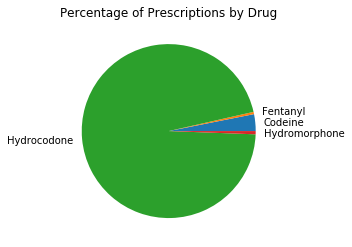

In [629]:
names = pd.unique(data_received_df["Drug"])
counts = [data_received_df[data_received_df.Drug == item].shape[0] for item in names]
plt.pie(counts, labels=names)
plt.title("Percentage of Prescriptions by Drug")
plt.show()
#Pie chart to show how many of each drug are represented within this dataframe - It may be reasonable to infer which drugs
#doctors prefer.

Text(0.5, 1.0, 'Side Effects Per Drug')

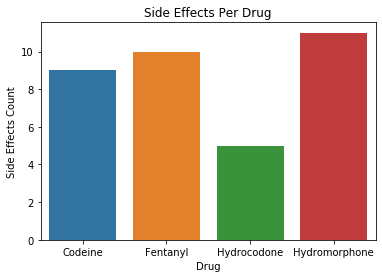

In [637]:
data_received_df["Side Effects Count"] = data_received_df["Side Effects"].str[1:-1].str.split(",").str.len()
sns.barplot(x=data_received_df["Drug"],y=data_received_df["Side Effects Count"]).set_title("Side Effects Per Drug")
#Chart to show which drugs have the most side effects.

Text(0.5, 1.0, 'Maximum Duration Per Drug')

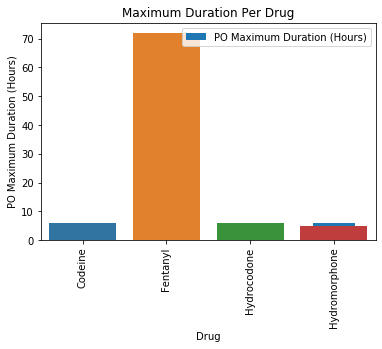

In [640]:
data_received_df["PO Maximum Duration (Hours)"] = data_received_df["PO Maximum Duration (Hours)"].astype(int)
data_received_df.plot.bar(x="Drug",y="PO Maximum Duration (Hours)")
sns.barplot(x=data_received_df["Drug"],y=data_received_df["PO Maximum Duration (Hours)"]).set_title("Maximum Duration Per Drug")
#Graph to show which durations from the drugs.

Text(0.5, 1.0, 'Maximum Onset Time Per Drug')

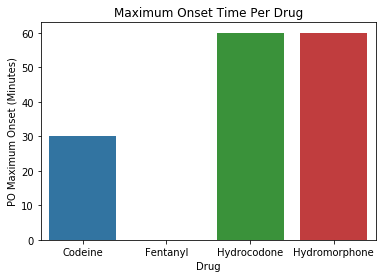

In [641]:
data_received_df["PO Maximum Onset (Minutes)"] = data_received_df["PO Maximum Onset (Minutes)"].astype(int)
sns.barplot(x=data_received_df["Drug"],y=data_received_df["PO Maximum Onset (Minutes)"]).set_title("Maximum Onset Time Per Drug")
#Graph to show how long it could take for a drug to take effect.

Text(0.5, 1.0, 'Maximum Peak Time Per Drug')

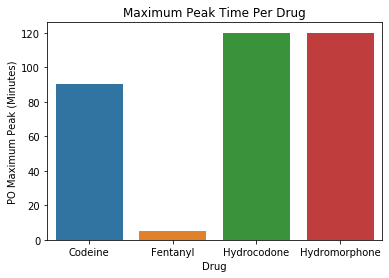

In [643]:
data_received_df["PO Maximum Peak (Minutes)"] = data_received_df["PO Maximum Peak (Minutes)"].astype(int)
sns.barplot(x=data_received_df["Drug"],y=data_received_df["PO Maximum Peak (Minutes)"]).set_title("Maximum Peak Time Per Drug")
#Graph to compare the maximum peak in time based on different drugs.